##Job layoff prediction classification models:

---


**Project Overview:**

**Objective**: Build and Evaluate • Random Forest (RF)
• XGBoost (XGB) Models for job layoff class prediction ("layoff" = 1,0 where 1 means yes and 0 means No death event.)

**Description**:

1. Data Source: for this project we have create our dataset
2. Data visulization: count plots, heatmap, pie chart etc.
3. Model Building and hypertuning:
4. Model Evaluation: Evaluate the performance of each model using accuracy score, AUC-ROC, confusion matrix, classification report.

**Prepared by:** Sumit Nalwade

**Professor:** Dr. Christelle Scharff

**Date:** 12-13-2023

---

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating dataframe
df = pd.read_csv('/content/capstone_modeling_data.csv')

In [ ]:
# Make a copy of dataframe
data = df.copy()

### EDA and Data visualization

In [ ]:
df.head(3)

,Age,BusinessTravel,Department,workmode,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,Laidoff
0,41,Travel_Rarely,Sales,office,2,2,Female,94,3,2,Single,Yes,3,1,8,Yes
1,49,Travel_Frequently,Research & Development,office,1,3,Male,61,2,2,Married,No,4,4,10,No
2,37,Travel_Rarely,Research & Development,office,2,4,Male,92,2,1,Single,Yes,3,2,7,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3066 non-null   int64 
 1   BusinessTravel            3066 non-null   object
 2   Department                3066 non-null   object
 3   workmode                  3066 non-null   object
 4   Education                 3066 non-null   int64 
 5   EnvironmentSatisfaction   3066 non-null   int64 
 6   Gender                    3066 non-null   object
 7   HourlyRate                3066 non-null   int64 
 8   JobInvolvement            3066 non-null   int64 
 9   JobLevel                  3066 non-null   int64 
 10  MaritalStatus             3066 non-null   object
 11  OverTime                  3066 non-null   object
 12  PerformanceRating         3066 non-null   int64 
 13  RelationshipSatisfaction  3066 non-null   int64 
 14  TotalWorkingYears       

categorical data in our dataset is 'object' & numerical features are 'int64.

In [ ]:
# Checking null values
df.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
workmode                    0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
MaritalStatus               0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
Laidoff                     0
dtype: int64

There are no null values in our dataset.

<Axes: xlabel='Laidoff', ylabel='count'>

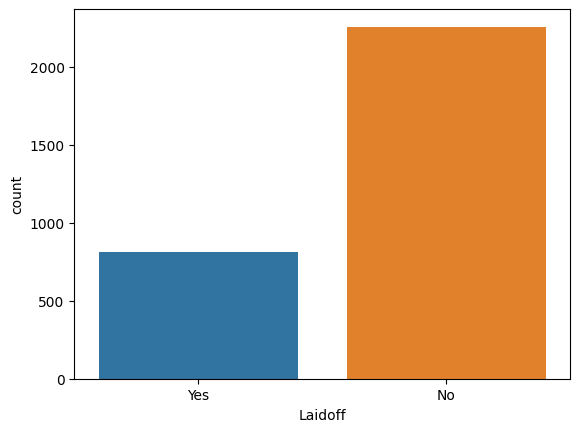

In [ ]:
# Count the target lable in our data.

sns.countplot(df, x  = 'Laidoff')

We can see there are more entries for 'No' lable in Target. class imbalance could affect our classification models hence we will use SMOTE technique to eliminate this issue.

([<matplotlib.patches.Wedge at 0x787925ef8fa0>,
 [Text(-0.5095058063104055, 0.9748865746003398, 'Male'),
  Text(0.5095058063104058, -0.9748865746003397, 'female')],
 [Text(-0.27791225798749386, 0.531756313418367, '65.3%'),
  Text(0.277912257987494, -0.531756313418367, '34.7%')])

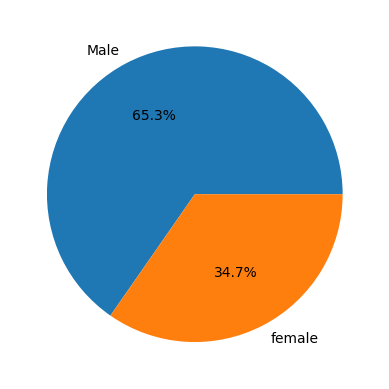

In [ ]:
# pie chart to check pecentage of males and females in our data
plt.pie(df['Gender'].value_counts(), labels= ['Male', 'female'], autopct='%1.1f%%')

We can see that there are more than 60% of data we have are related to male employees.

Males are nearly 2 times of female in our dataset.

<Axes: xlabel='Gender', ylabel='count'>

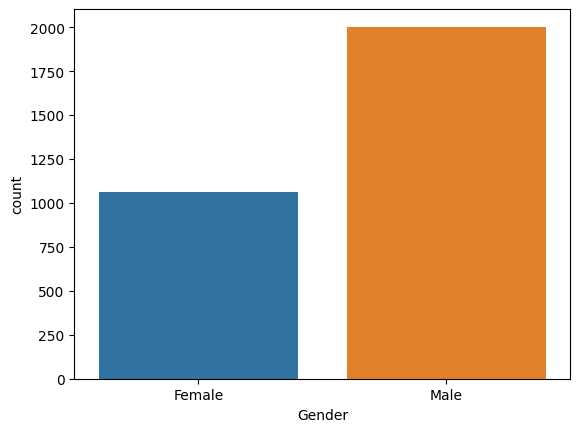

In [ ]:
# Check the count of Male and female in our data
sns.countplot(df, x= 'Gender')

<Axes: xlabel='Laidoff', ylabel='count'>

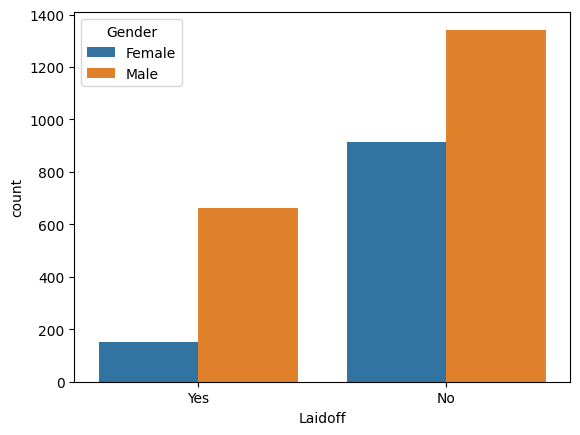

In [ ]:
# Check the count of layoffs on the basis of gender
sns.countplot(df, x  = df['Laidoff'], hue = 'Gender')

Male employes laidoff of more than female. This resule is might be due to more nummber of male in our dataset.

<Axes: xlabel='Age', ylabel='Laidoff'>

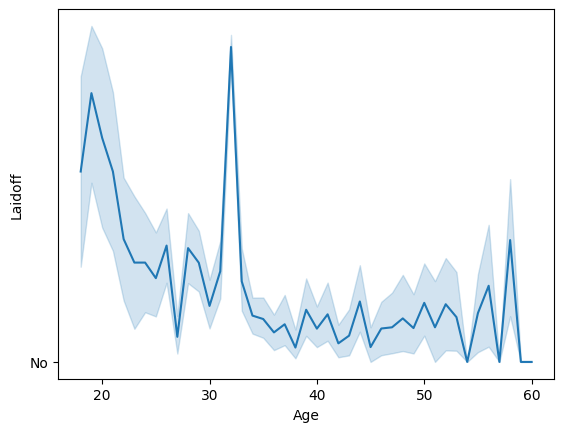

In [ ]:
# Layoffs on basis of Age
sns.lineplot(data = df, x = df['Age'], y = df['Laidoff'] )

Employes who belongs to 30-35 years age group are more likely to layoff.
Also, 20 to 23 years employees are also at risk of layoffs could be because they just joined a company and not have much industry experience.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'workmode', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'Laidoff'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to each categorical column
for column in ['BusinessTravel', 'Department', 'workmode', 'Gender', 'MaritalStatus','OverTime', 'Laidoff']:
    df[column+'_encoded'] = label_encoder.fit_transform(df[column])

In [ ]:
data_encode = df[['Age','Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','BusinessTravel_encoded', 'Department_encoded', 'workmode_encoded',
       'Gender_encoded','OverTime_encoded', 'MaritalStatus_encoded','TotalWorkingYears','RelationshipSatisfaction','PerformanceRating', 'Laidoff_encoded']]

In [ ]:
data_encode.head(3)

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,BusinessTravel_encoded,Department_encoded,workmode_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,TotalWorkingYears,RelationshipSatisfaction,PerformanceRating,Laidoff_encoded
0,41,2,2,94,3,2,2,8,2,0,1,2,8,1,3,1
1,49,1,3,61,2,2,1,7,2,1,0,1,10,4,4,0
2,37,2,4,92,2,1,2,7,2,1,1,2,7,2,3,1


In [ ]:
label_mapping = dict(zip(df['Laidoff'],data_encode['Laidoff_encoded']))
print("Label Mapping:", label_mapping)

Label Mapping: {'Yes': 1, 'No': 0}


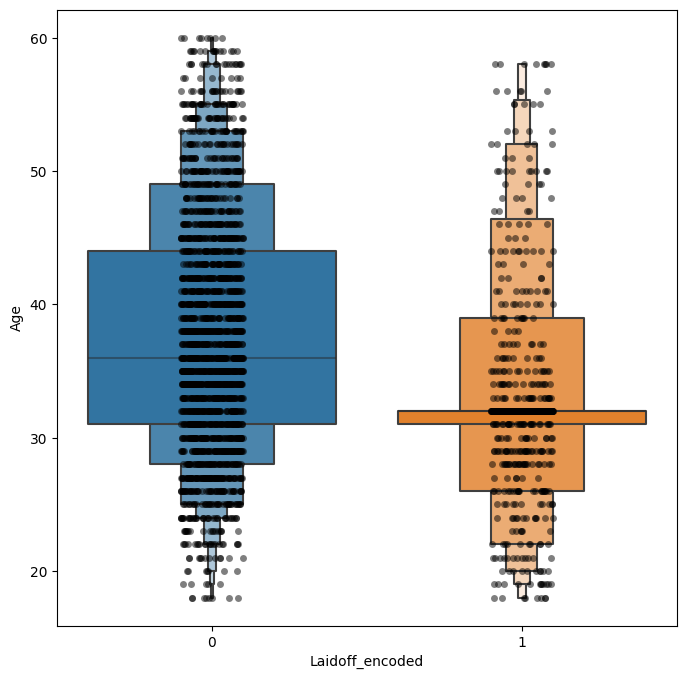

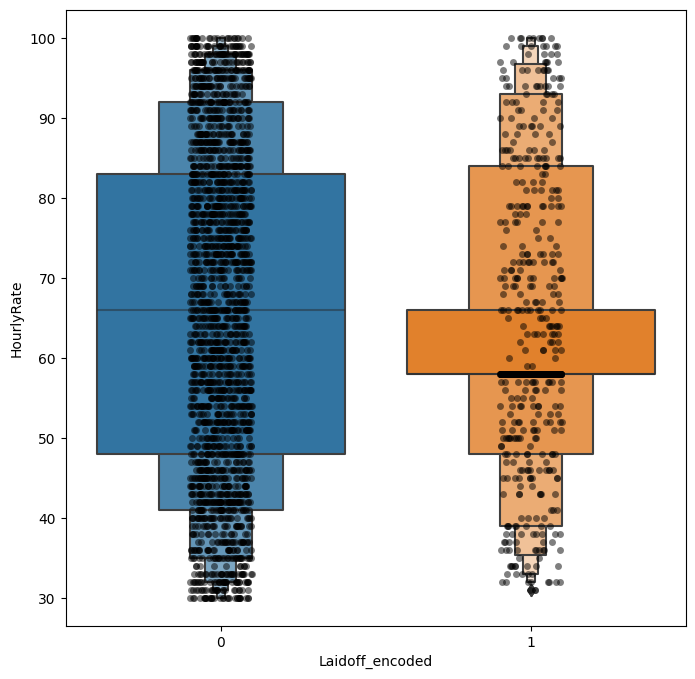

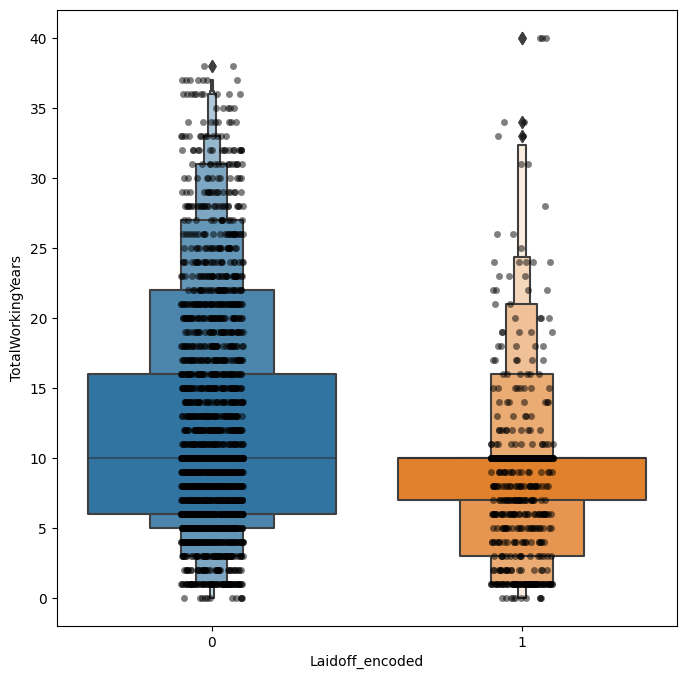

In [ ]:
# Boxen and swarm plot of numerical features.
numerical_features = ["Age","HourlyRate","TotalWorkingYears"]
for i in numerical_features :
    plt.figure(figsize=(8,8))
    sns.stripplot(x=data_encode
    ["Laidoff_encoded"], y=data_encode
    [i], color="black", alpha = 0.5 , marker ='o')
    sns.boxenplot(x=data_encode
    ["Laidoff_encoded"], y=data_encode
    [i])
    plt.show()

We have not found outliers in our numerical feautres. Data almost equally distributed through out the data.

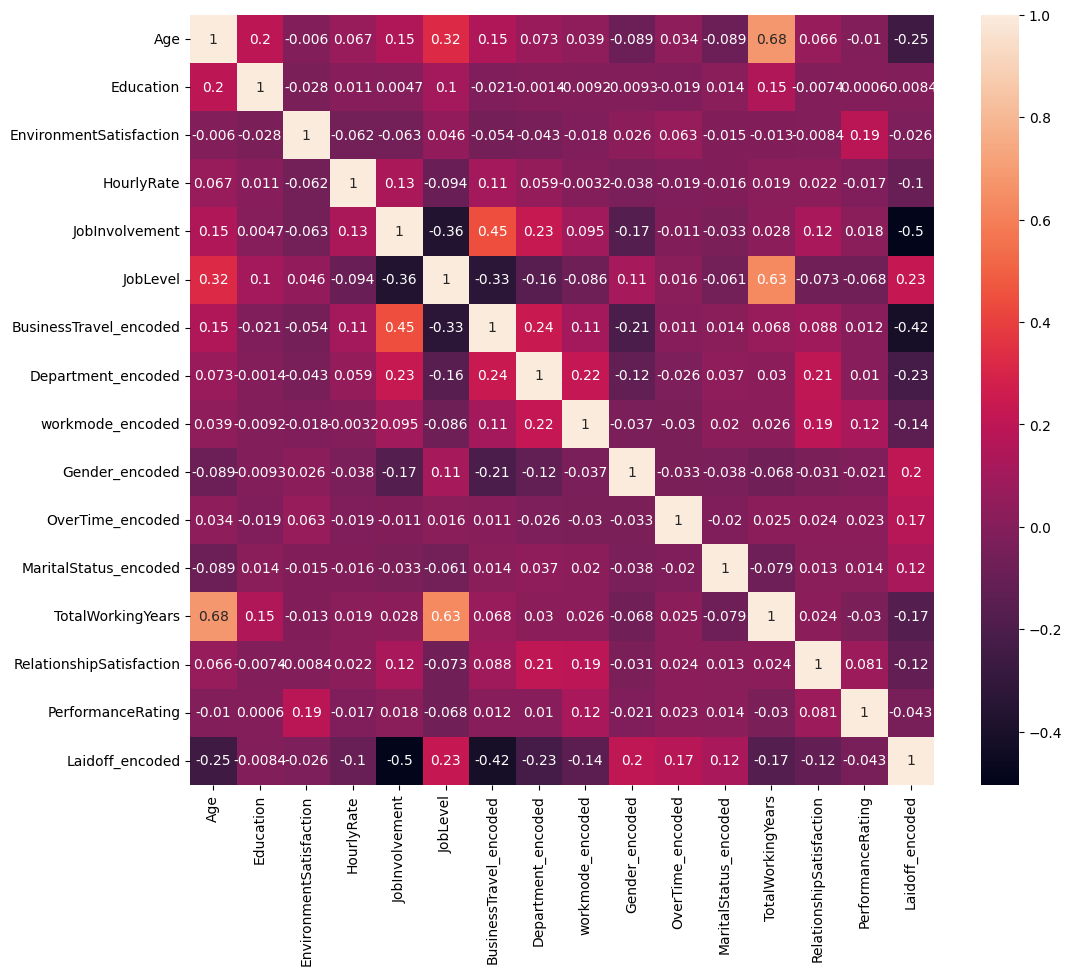

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(data_encode.corr(), annot = True)
plt.show()

* Job invlovement and Business travel have shown high negative correlation with Layoffs. Menas decrease in both feature increase chance of layoff.
* Intrestingly it shows high negative correlation between job level and job involvement. Means with increase in job level, job involvment is decreasing

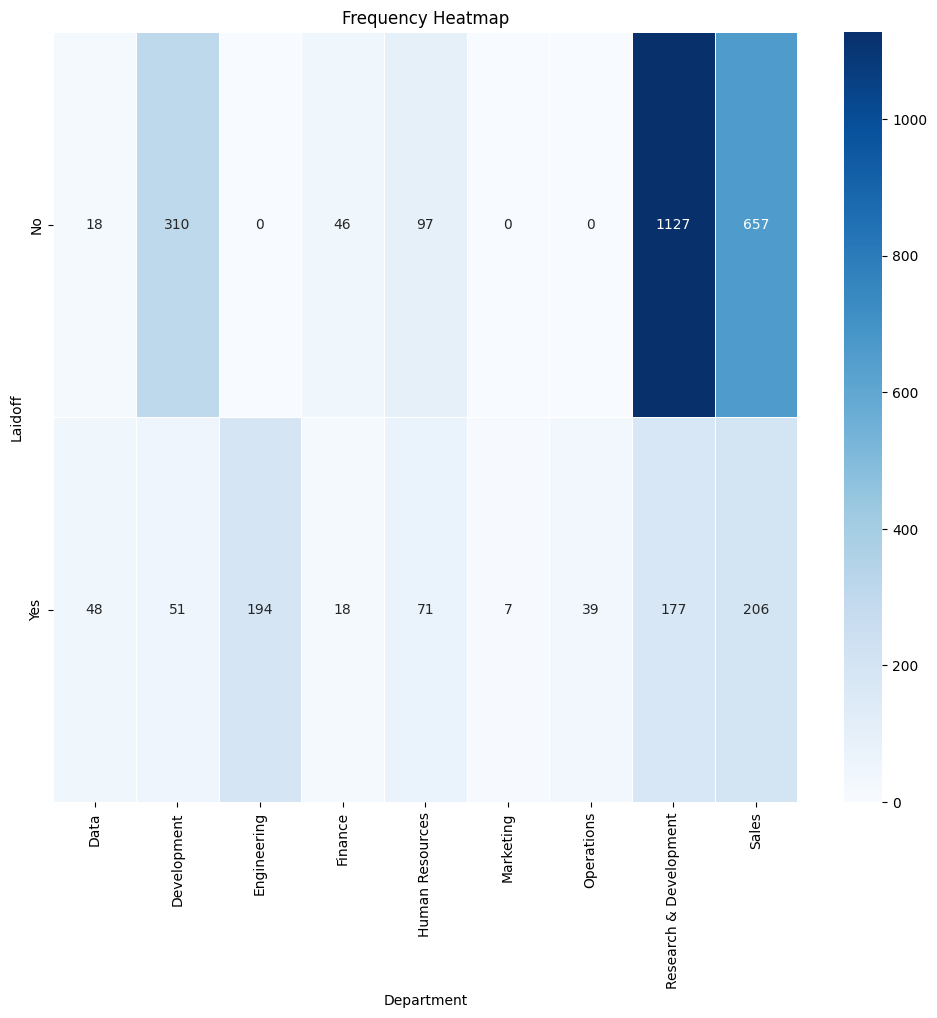

In [ ]:

# Create a frequency table for two categorical variables
label_data = df['Laidoff']
categorical_data = df.drop('Laidoff', axis=1)

# Combine the label and categorical data for counting
combined_data = pd.concat([label_data, categorical_data], axis=1)

# Create a cross-tabulation (frequency table)
cross_tab = pd.crosstab(index=combined_data['Laidoff'], columns=categorical_data['Department'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt="d", linewidths=.5)

# Display the plot
plt.title('Frequency Heatmap')
plt.show()


* From the above heatmap we can see Engineering department is most prone to layoffs.
* R&D and Sales are most safest departments in terms of layoffs.

#### Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Creating Target and feature data
X = data_encode.drop("Laidoff_encoded", axis=1)  # Features
y = data_encode["Laidoff_encoded"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Random Forest classifier

In [ ]:
# Function to calculate accuracy and AUC-ROC of a model
def get_result(y_true, y_pred):
  return {
      'Accuracy': accuracy_score(y_true, y_pred)*100,
      'AUC-ROC' : roc_auc_score(y_true, y_pred)

      }

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
result_rf = get_result(y_test, y_pred_rf)
print(result_rf)
print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf))

{'Accuracy': 90.39087947882736, 'AUC-ROC': 0.8581168831168832}

Confussion Matrix:
 [[437  23]
 [ 36 118]]

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       460
           1       0.84      0.77      0.80       154

    accuracy                           0.90       614
   macro avg       0.88      0.86      0.87       614
weighted avg       0.90      0.90      0.90       614



Feature Importances:
 JobInvolvement              0.175691
Age                         0.147281
HourlyRate                  0.111774
TotalWorkingYears           0.104858
BusinessTravel_encoded      0.083753
JobLevel                    0.074483
EnvironmentSatisfaction     0.052982
Department_encoded          0.049607
Education                   0.037840
workmode_encoded            0.037401
MaritalStatus_encoded       0.030910
RelationshipSatisfaction    0.029139
OverTime_encoded            0.025548
Gender_encoded              0.022299
PerformanceRating           0.016434
dtype: float64


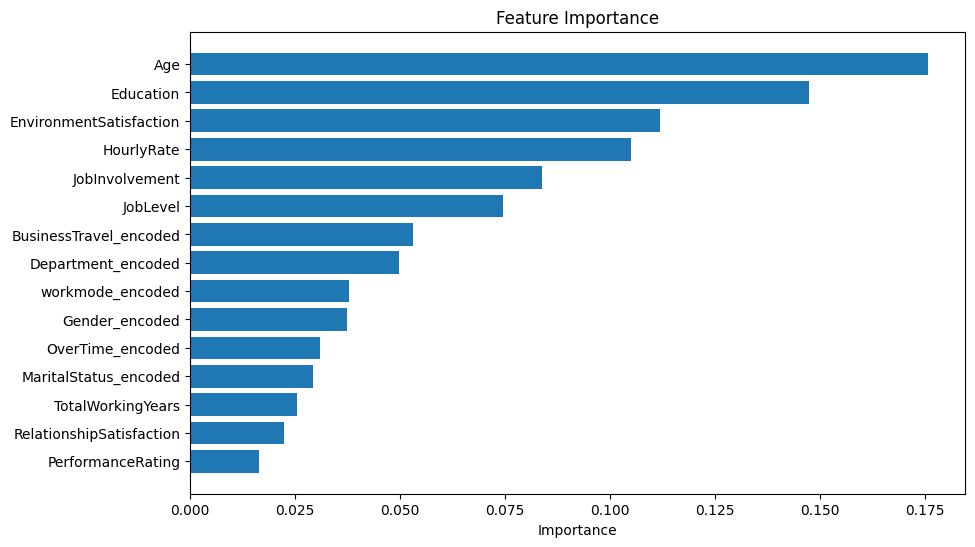

In [ ]:
# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:\n", feature_importances)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

#### XGBoost classifier

In [ ]:
# XGBoost (XGB)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_classifier.predict(X_test)
result_xgb_1 = get_result(y_test, y_pred_xgb)
print(result_xgb_1)
print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost model:\n", classification_report(y_test, y_pred_xgb))

{'Accuracy': 92.34527687296416, 'AUC-ROC': 0.894918125352908}

Confussion Matrix:
 [[438  22]
 [ 25 129]]

Classification Report XGBoost model:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       460
           1       0.85      0.84      0.85       154

    accuracy                           0.92       614
   macro avg       0.90      0.89      0.90       614
weighted avg       0.92      0.92      0.92       614



In [ ]:
pip install lime shap eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=07f237763f55a21775a1cefb07d49d2bea352d4f5f14b47b5dc445df8035a119
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=e35c1ce7032003cb58a9439df3a00c4efdc9c3e0a6fb869dc6f2ac826277af0e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built lime eli5


In [ ]:
import eli5

In [ ]:
# storing all the feature names
feature_name = X_test.columns.to_list()

In [ ]:
# Applying eli5 on the rf model
eli5.show_weights(rf_model, feature_names= feature_name )

Weight,Feature
0.1757 ± 0.2528,JobInvolvement
0.1473 ± 0.1845,Age
0.1118 ± 0.1358,HourlyRate
0.1049 ± 0.0976,TotalWorkingYears
0.0838 ± 0.1533,BusinessTravel_encoded
0.0745 ± 0.1132,JobLevel
0.0530 ± 0.0373,EnvironmentSatisfaction
0.0496 ± 0.0906,Department_encoded
0.0378 ± 0.0301,Education
0.0374 ± 0.0569,workmode_encoded


In [ ]:
# Employee laidoff
pos_entry = X_train_resampled[y_train_resampled == 1][1:2]

In [ ]:
# Positive Label
eli5.show_prediction(rf_model, pos_entry, feature_names = feature_name)

In [ ]:
# Employee not laidoff
neg_entry = X_train_resampled[y_train_resampled == 0][55:56]

In [ ]:
# Positive Label
eli5.show_prediction(rf_model, neg_entry, feature_names = feature_name)

Eli5 elucidates the influential factors behind predictions made by the random forest model. It identifies the feature "<BIAS>" as the predominant contributor to both "1" and "0" labels. Additionally, Eli5 emphasizes the substantial positive influence of the "Job Involvement" feature on the model's label predictions.


In [ ]:
import lime
import lime.lime_tabular as lt


In [ ]:
# lime on Random forest
predict_fn_rf = lambda x: rf_model.predict_proba(x).astype(float)
rf_explainer = lt.LimeTabularExplainer(
    X_train.values,
    mode = 'classification',
    feature_names = X_train.columns,
    training_labels= y_train,
    class_names=[0, 1],
    kernel_width=5
)

In [ ]:
rf_explanation = rf_explainer.explain_instance(X_train[5:6].values[0], predict_fn_rf,num_features=len(X_train.columns) )
rf_explanation.show_in_notebook(show_table = True)

In [ ]:
print("coefficients : ", rf_explanation.local_exp)
print("Intercept: ", rf_explanation.intercept)
print("R2 score: ",rf_explanation.score)


coefficients :  {1: [(4, -0.10970941847736922), (10, -0.08630863622496371), (8, 0.05701204791800636), (0, -0.05420745296363681), (5, -0.04502177417838621), (6, 0.04344528806095701), (11, -0.03843820195437644), (1, -0.020450376604048637), (14, 0.0201290504928423), (2, -0.017435763625061343), (7, -0.008114737156087118), (13, 0.0059841024054722615), (9, 0.004558016323331808), (3, -0.0006636819749939538), (12, 0.0005085331432010041)]}
Intercept:  {1: 0.3675727290691772}
R2 score:  0.3053844809859031


Low R2 score suggest that local regression model does not fit well. Hence, we can not much rely on the information provided by LIME.

In [ ]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [ ]:
# Create shap tree explainer
explainer = shap.TreeExplainer(xgb_classifier)


In [ ]:
# Calculate shap values for the test data
shap_values = explainer.shap_values(X_test)

In [ ]:
# Establishing 'base value'
explainer.expected_value

-0.06270017

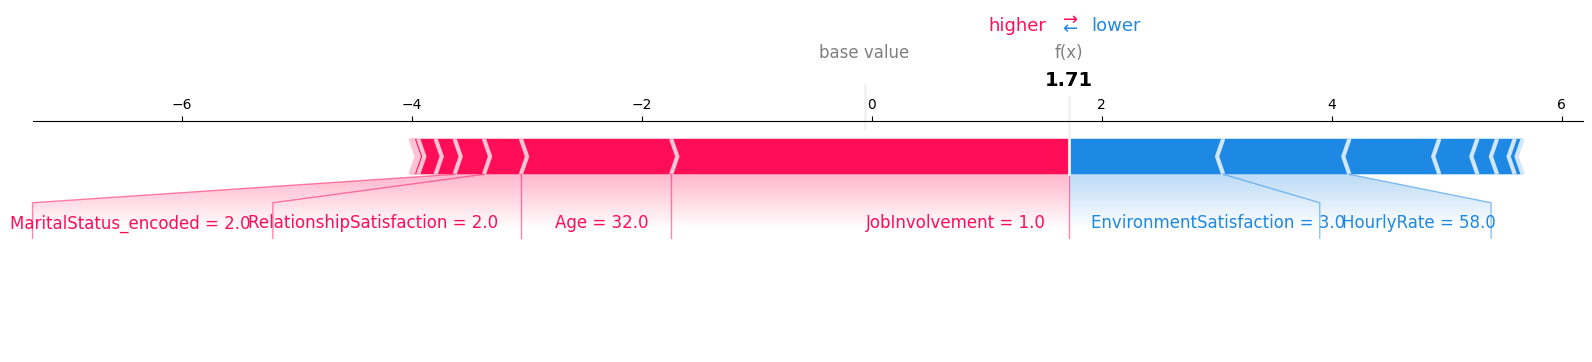

In [ ]:
# Positive Label
shap.force_plot(explainer.expected_value, shap_values[0,:],  X_train_resampled[y_train_resampled == 1][1:2], matplotlib=True)

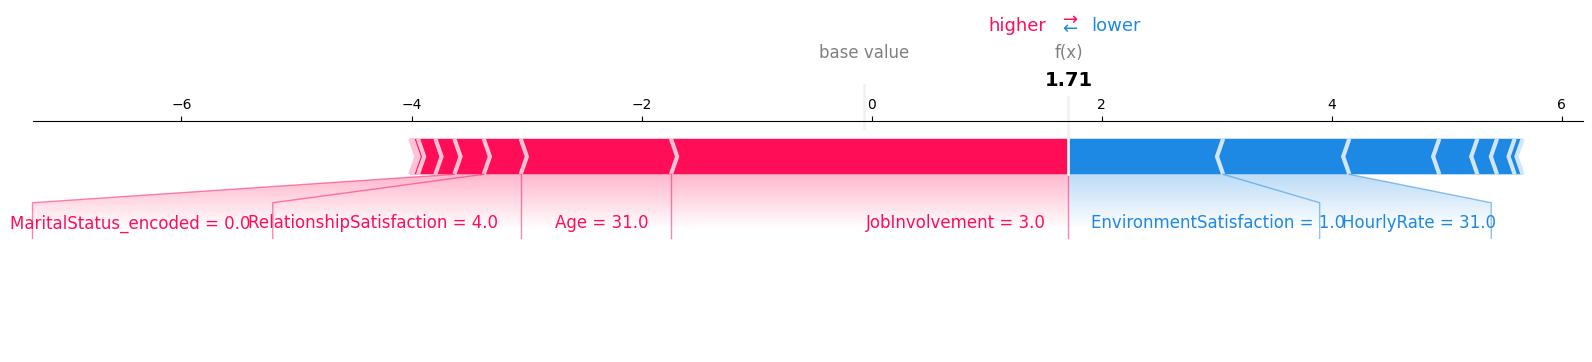

In [ ]:
# Negative Label
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_resampled[y_train_resampled == 0][56:57], matplotlib=True)

SHAP force plot showing the influence of each factor in predicting a positive and negative class.
Feature in Red forcing model prediction toward positive class i.e. 1 while feature in blue forcing prediction toward negative class i.e. 0.


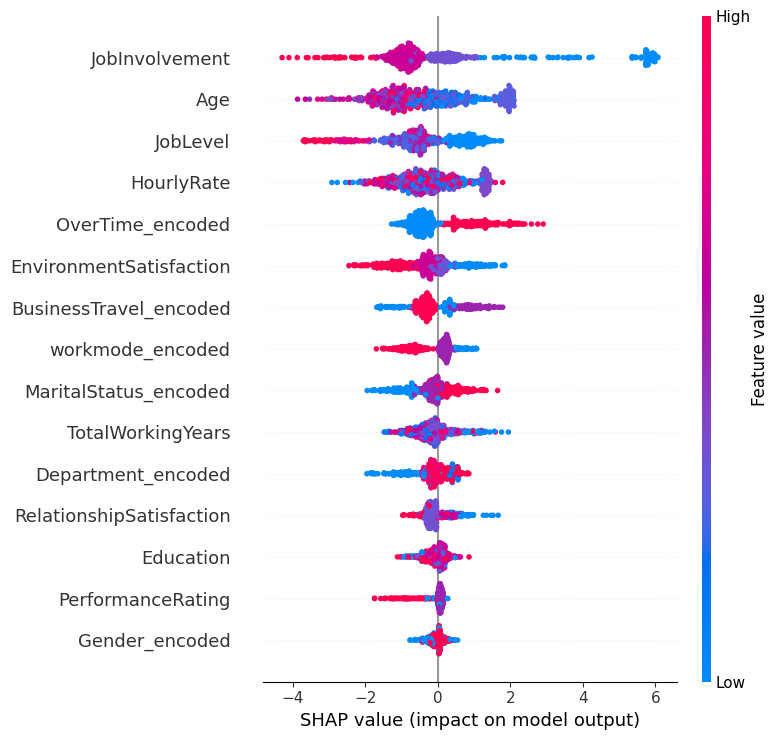

In [ ]:
shap.summary_plot(shap_values, features= X_test)

From the above SHAP summary plot we can observver that Jobinvolvemet is highest contributed factor in predicted 0 & 1 class. With the decrease in jon involvement risk of layoff increases.

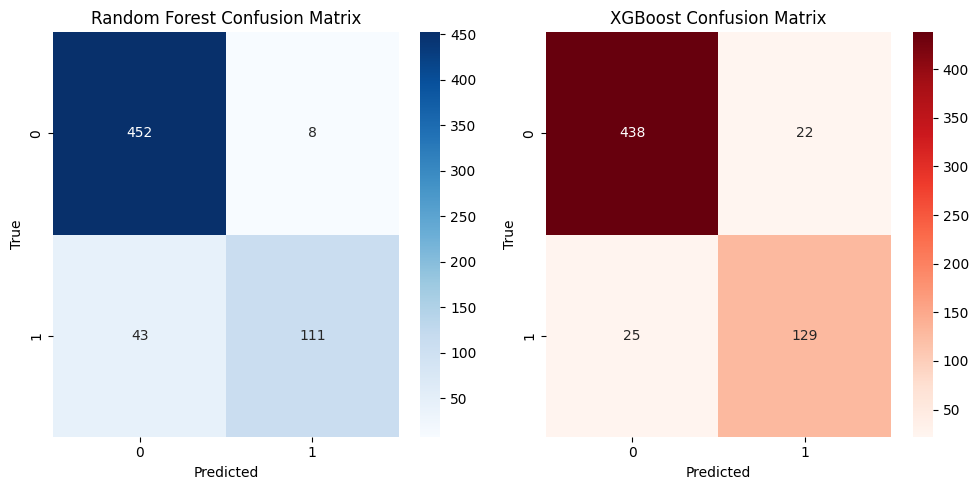

In [ ]:
# Create confusion matrices
rf_cm = confusion_matrix(y_test, y_pred_rf)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Random Forest confusion matrix
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Plot XGBoost confusion matrix
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Reds", ax=axes[1],
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Adjust layout
plt.tight_layout()
plt.show()

XGBoost model decreased the false negative prediction around 50% as compare to random forest classification model.

#### Hypertuning the random forest model

In [ ]:
# Hyperparameter Tuning Function
def param_search(estimator, param_grid, x_train, y_train):
  grid_search = GridSearchCV(
      estimator = estimator,
      param_grid = param_grid,
      scoring='accuracy',
      cv = 10,
      n_jobs=-1
  )
  grid_search.fit(x_train, y_train)
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_

  print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
  print("Best Parameters: ", best_parameters)

In [ ]:
# Random Forest
parameters = dict(
    n_estimators = [25, 50, 75, 100],
    criterion = ['gini', 'entropy', 'log_loss'],
    random_state = [3, 5, 8, 10],
    max_depth = [3, 6, 9],
    max_features = [None, 'sqrt', 'log2']
)
param_search(rf_model, parameters, X_train_resampled, y_train_resampled)

Best Accuracy: 90.08 %
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 5}


In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 9, max_features =  None, n_estimators=100,random_state = 42)

# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=9, max_features=None, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
get_result(y_pred, y_test)

{'Accuracy': 90.39087947882736, 'AUC-ROC': 0.8803847480245304}

In [ ]:
confusion_matrix(y_pred, y_test)

array([[444,  46],
       [ 16, 108]])

Even After hypertuing random forest model accuracy remains same.

##### Conclusion

In [ ]:
compare = pd.DataFrame({
    'Model':['Random Forest',"XGBoost"],
    'Accuracy Score' : [result_rf["Accuracy"],result_xgb_1["Accuracy"]],
    'AUC-ROC': [result_rf['AUC-ROC'],result_xgb_1['AUC-ROC']]
})

In [ ]:
compare

,Model,Accuracy Score,AUC-ROC
0,Random Forest,90.390879,0.858117
1,XGBoost,92.345277,0.894918


XGBoost outperform Random forest as it gives accuracy of 92%